In [59]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

## Implementing a perceptron using PyTorch

In [3]:
class Perceptron(nn.Module):
    """
    A Perceptron class is a one composed of one linear layer
    """
    def __init__(self, input_dim):
        """
        ARGs:
            input_dim (int): size of the input features
        """
        super(Perceptron, self).__init__()
        self.fc1 = nn.Linear(input_dim, 1)
        
    def forward(self, x_in):
        """The forward pass of the perceptron
        ARGs:
            x_in (torch.Tensor): an input data tensor
                x_in.shape should be (batch, num_features)
                
        RETURNS:
            The resulting tensor. 
                tensor.shape should be (batch,)
        """
        return torch.sigmoid(self.fc1(x_in)).squeeze()

## Activation functions

### Sigmoid
The sigmoid is one of the earliest used activation functions in Neural Network history. It takes any real value and squashes it into the range between 0 and 1. 

$$f(x)= \frac{1}{1+e^{-x}}$$

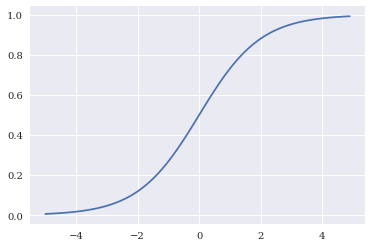

In [9]:
x = torch.arange(-5., 5., 0.1)
y = torch.sigmoid(x)
plt.plot(x.numpy(), y.numpy())
plt.show()

### Tanh
The tanh activation function is a cosmetically different varient of the sigmoid. 

$$f(x) = tanh x = \frac{e^x - e^{-x}}{e^x + e^{-x}}$$

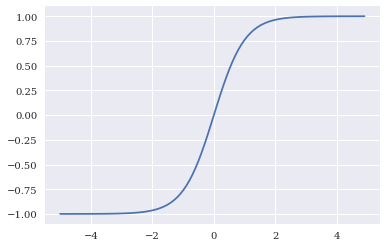

In [10]:
x = torch.arange(-5., 5., 0.1)
y = torch.tanh(x)
plt.plot(x.numpy(), y.numpy())
plt.show()

### ReLU
*Rectified Linear Unit*. This is arguably the most important of the activation functions. Many of the receent innovations in deep learning would've been impossible without the use of ReLU. 

$$f(x) = max(0,x)$$

All the ReLU is doing is clipping the negative values to zero

#### Dying ReLU
Though the clipping effect of ReLU that helps with the vanishing gradient problem can also become an issue, where over time certain outputs in the network can simply become zero and never revive again. 

To mitigate that effect, varients usch as Leaky ReLU and Parametric ReLU activation functions have proposed, where the leak coefficient $a$ is a learned parameter

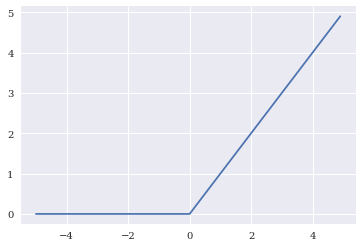

In [11]:
relu = torch.nn.ReLU()

x = torch.arange(-5., 5., 0.1)
y = relu(x)

plt.plot(x.numpy(), y.numpy())
plt.show()

### PReLU

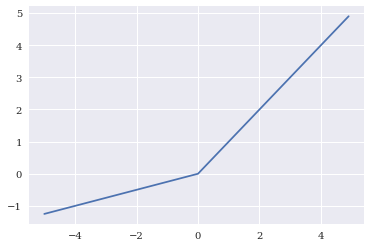

In [21]:
prelu = torch.nn.PReLU(num_parameters=1)

x = torch.arange(-5., 5., 0.1)
y = prelu(x)
plt.plot(x.numpy(), y.detach().numpy())
plt.show()

### Softmax
Another choice for activation function is the softmax. Like the sigmoid function, the softmax function squashes the ouput of each unit to be between 0 and 1. 

However the softmax operation also divides each output by the sum of all the outputs, which gives us a discrete probabiluty distribution over $k$ possible classes: 

$$f(x_i) = \frac{e^{x_i}}{\sum_{j=1}^{k}e^{x_j}}$$

The probabilities in the resulting distribution all sum up to one. Which becomes very useful for interpreting outputs for classification tasks, and so this transformation is usually paried with a probabilistic training objective, such as: **cross entropy** 

In [22]:
softmax = torch.nn.Softmax(dim=1)
x_input = torch.randn(1,3)
y_output = softmax(x_input)
print(x_input)
print(y_output)
print(torch.sum(y_output, dim=1))

tensor([[2.0813, 0.0872, 0.3462]])
tensor([[0.7619, 0.1037, 0.1344]])
tensor([1.])


## Loss Functions
Also known as the *objective function* which helps guide the training algorithm to pick the right parameters by looking at the data. 

The higher the loss function, the worse the models predictions are. 

### Mean Squared Error Loss
For **regression problems** for which the network's output ($\hat{y}$) and the target ($y$) are continous value. 

$$L_{MSE}(y,\hat{y})=\frac{1}{n}\sum_{i=1}^{n}(y-\hat{y})^2$$

The MSE is simply: The aversge of the squares of the difference between the predicted and target values.

In [44]:
mse_loss = nn.MSELoss()
outputs = torch.randn(3,5, requires_grad=True)
targets = torch.randn(3,5)
loss = mse_loss(outputs, targets)
print(loss.item())

1.023229718208313


### Categorical Cross-Entropy Loss
The categorical cross entropy loss is typically used in **multiclass classification** in which the outputs are interpreted as predictions of class membership abilitie. 

The target ($y$) is a vector of $n$ elements that represent the true multinomial distribution over all the classes. 

If only one class if correct, this vector is a one-hot vector. 

The networks output ($\hat{y}$) is also a vector of $n$ elemetns but represents the networks prediction of the multinomial distribution. 

$$L(y,\hat{y})=-\sum_{i}y_ilog(\hat{y}_i)$$

This is method to compute how different two distributions are. We want the probability of the correct class to be close to 1, whereass the other class to have a probability of 0

####  The Four pieces of information that DETERMINE the nuanced relationship between network outputs and loss function 

1. There is a limit to how small or how large a number can be
2. If input to the exoponential function used in the softmax formula is a negative number, the resultant is an exponentially small number, and if it's a positive number, the resultant is an exponentially large number.
3. The network's output is assumed to be a vector just prior to applying the softmax function
4. $log(exp(x))$ is just equal to $x$

In [48]:
ce_loss = nn.CrossEntropyLoss()
outputs = torch.randn(3,5, requires_grad=True)
targets = torch.tensor([1,0,3], dtype=torch.int64)
loss = ce_loss(outputs, targets)
print(loss.item())

2.481422185897827


### Binary Cross-Entropy Loss
Sometimes, our task invovles discriminating between two classes: **Binary Classification**. For these situations it's best to use **BCE Loss**. 

In [58]:
bce_loss = nn.BCELoss()
sigmoid = nn.Sigmoid()

probabilities = sigmoid(torch.randn(4,1,requires_grad=True))
targets = torch.tensor([1,0,1,0], dtype=torch.float32).view(4,1)

loss = bce_loss(probabilities, targets)
print(loss.item())

0.993760883808136


## Supervised Training
Supervised learning requires the following:
* **A Model**
* **A Loss Function**
* **Training Data**
* **Optimization Algorithm**

**Training data** for supervised learning is pairs of *observations* and *targets*. 

**Model** computes predictions from the obersevations 

**Loss** measures the error of the predictions as compared to the targets

**Gradient-based Optimization Algorithms** adjusts the model's parameters so that the losses are as low as possible

In [64]:
# Instaniating
input_dim = 2
lr = 1e-3

# 1. Selecting the model
perceptron = Perceptron(input_dim=input_dim)

# 2. Selecting our Loss Function
bce_loss = nn.BCELoss()

# 3. Selecting out optimizer
optimizer = optim.Adam(params=perceptron.parameters(), lr=lr)

### Putting It All Together

* Any bookkeeping information, such as gradients, currently stored inside the **model** (Perceptron) object is cleared with a function named: ```zero_grad()```. 


* The model computes outputs (```y_pred```) given the input data (```x_data```).


* The loss is computed by comparing model outputs (```y_pred```) to intended targets (```y_target```)


* The PyTorch loss object ```criterion``` has a function named ```backward()``` that iteraively propogates the loss backward through the computational graph and notifies each parameter of its gradient.


* The optimizer (```opt```) instructs the parameters how to update their values knowing the gradient with function named ```step()```


* The entire training dataset is partitioned into ```batches```. Each iteration of the gradient step is performed on a batch of data. 


* A hyperparameter named ```batch_size``` specifcies the size of the batches


* After a number of batches, the training loop has completed an ```epoch```: is a complete training iteration. 


* The supervised training loop is thus a nested loop:
    * Inner loop over a dataset or set number of batches
    * Outer loop which repeats the inner loop over a fixed number of epochs

In [ ]:
# Each epoch is a completed pass over the training data
for epoch_i in range(n_epochs):
    
    # The inner loop is over the batches in the dataset
    for batch_i in range(n_batches):
        
        # Step 0: Get the data
        x_data, y_target = get_toy_data(batch_size)
        
        # Step 1: Clear the gradients
        perceptron.zero_grad()
        
        # Step 2: Compute the forward pass of the model
        y_pred = perceptron(x_data, apply_sigmoid=True)
        
        # Step 3: Compute the loss value which we will optimize
        loss = bce_loss(y_pred, y_target)
        
        # Step 4: Propogate the loss signal backward
        loss.backward()
        
        # Step 5: Trigger the optimizer to perform one update
        optimizer.step()